<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n250.csv',
 'data_add_delta_-1.2_n120.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.730401,92.071158,22.472910,0.133333,223.407803,223.296883,0.110921
1,0.0,1.0,78.803327,29.670409,75.584711,-0.026675,194.031771,194.067209,-0.035438
2,0.0,2.0,23.803060,69.813853,92.551144,-0.033604,196.134453,196.165636,-0.031183
3,0.0,3.0,49.474315,87.150058,86.193274,0.099594,232.917239,232.822715,0.094525
4,0.0,4.0,46.489228,90.718497,24.612332,0.032606,171.852663,171.830522,0.022141
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.950584,40.003692,83.336392,0.019976,193.310644,193.302012,0.008633
249996,999.0,246.0,31.119727,61.015642,30.027277,0.012844,132.175490,132.149310,0.026180
249997,999.0,247.0,33.056758,68.938380,54.406092,0.049804,166.451033,166.388223,0.062810
249998,999.0,248.0,27.637739,83.569321,93.802818,-0.002784,215.007094,214.994097,0.012997


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.730401,92.071158,22.472910,0.133333,223.407803,223.296883,0.110921
1,0.0,1.0,78.803327,29.670409,75.584711,-0.026675,194.031771,194.067209,-0.035438
2,0.0,2.0,23.803060,69.813853,92.551144,-0.033604,196.134453,196.165636,-0.031183
3,0.0,3.0,49.474315,87.150058,86.193274,0.099594,232.917239,232.822715,0.094525
4,0.0,4.0,46.489228,90.718497,24.612332,0.032606,171.852663,171.830522,0.022141
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.950584,40.003692,83.336392,0.019976,193.310644,193.302012,0.008633
249996,999.0,246.0,31.119727,61.015642,30.027277,0.012844,132.175490,132.149310,0.026180
249997,999.0,247.0,33.056758,68.938380,54.406092,0.049804,166.451033,166.388223,0.062810
249998,999.0,248.0,27.637739,83.569321,93.802818,-0.002784,215.007094,214.994097,0.012997


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.730401  92.071158  22.472910  ...  223.407803  223.296883  0.110921
      1.0    78.803327  29.670409  75.584711  ...  194.031771  194.067209 -0.035438
      2.0    23.803060  69.813853  92.551144  ...  196.134453  196.165636 -0.031183
      3.0    49.474315  87.150058  86.193274  ...  232.917239  232.822715  0.094525
      4.0    46.489228  90.718497  24.612332  ...  171.852663  171.830522  0.022141
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  59.950584  40.003692  83.336392  ...  193.310644  193.302012  0.008633
      246.0  31.119727  61.015642  30.027277  ...  132.175490  132.149310  0.026180
      247.0  33.056758  68.938380  54.406092  ...  166.451033  166.388223  0.062810
      248.0  27.637739  83.569321  93.802818  ...  215.007094  214.994097  0.012997
      249.0  77.327632  95.986937  39.852502  ...  223.138678  223.153351 -0.014674

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.730401  92.071158  22.472910  ...  223.407803  223.296883  0.110921
      1.0    78.803327  29.670409  75.584711  ...  194.031771  194.067209 -0.035438
      2.0    23.803060  69.813853  92.551144  ...  196.134453  196.165636 -0.031183
      3.0    49.474315  87.150058  86.193274  ...  232.917239  232.822715  0.094525
      4.0    46.489228  90.718497  24.612332  ...  171.852663  171.830522  0.022141
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  59.950584  40.003692  83.336392  ...  193.310644  193.302012  0.008633
      246.0  31.119727  61.015642  30.027277  ...  132.175490  132.149310  0.026180
      247.0  33.056758  68.938380  54.406092  ...  166.451033  166.388223  0.062810
      248.0  27.637739  83.569321  93.802818  ...  215.007094  214.994097  0.012997
      249.0  77.327632  95.986937  39.852502  ...  223.138678  223.153351 -0.014674

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.730401,92.071158,22.472910,0.133333,223.407803,223.296883,0.110921
1,0.0,1.0,78.803327,29.670409,75.584711,-0.026675,194.031771,194.067209,-0.035438
2,0.0,2.0,23.803060,69.813853,92.551144,-0.033604,196.134453,196.165636,-0.031183
3,0.0,3.0,49.474315,87.150058,86.193274,0.099594,232.917239,232.822715,0.094525
4,0.0,4.0,46.489228,90.718497,24.612332,0.032606,171.852663,171.830522,0.022141
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.950584,40.003692,83.336392,0.019976,193.310644,193.302012,0.008633
249996,999.0,246.0,31.119727,61.015642,30.027277,0.012844,132.175490,132.149310,0.026180
249997,999.0,247.0,33.056758,68.938380,54.406092,0.049804,166.451033,166.388223,0.062810
249998,999.0,248.0,27.637739,83.569321,93.802818,-0.002784,215.007094,214.994097,0.012997


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.730401  92.071158  22.472910  ...  223.407803  223.296883  0.110921
      1.0    78.803327  29.670409  75.584711  ...  194.031771  194.067209 -0.035438
      2.0    23.803060  69.813853  92.551144  ...  196.134453  196.165636 -0.031183
      3.0    49.474315  87.150058  86.193274  ...  232.917239  232.822715  0.094525
      4.0    46.489228  90.718497  24.612332  ...  171.852663  171.830522  0.022141
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  59.950584  40.003692  83.336392  ...  193.310644  193.302012  0.008633
      246.0  31.119727  61.015642  30.027277  ...  132.175490  132.149310  0.026180
      247.0  33.056758  68.938380  54.406092  ...  166.451033  166.388223  0.062810
      248.0  27.637739  83.569321  93.802818  ...  215.007094  214.994097  0.012997
      249.0  77.327632  95.986937  39.852502  ...  223.138678  223.153351 -0.014674

[250000 rows x 7 columns]

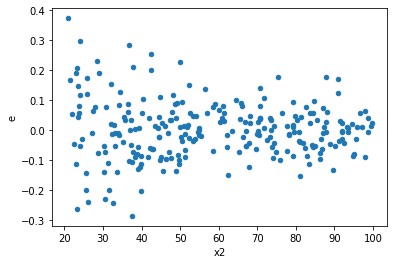

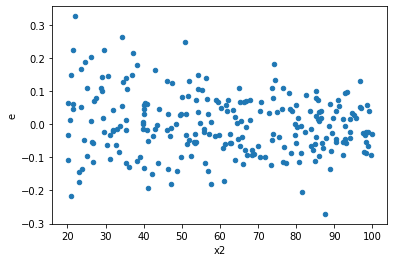

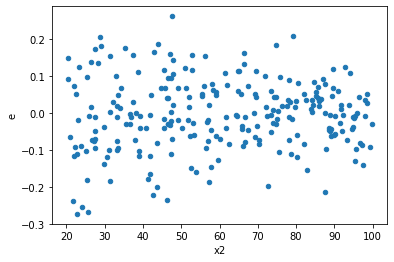

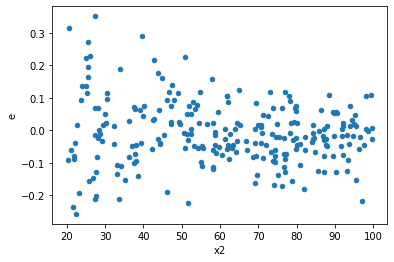

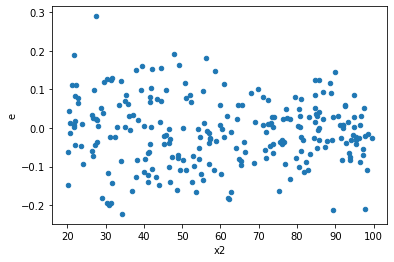

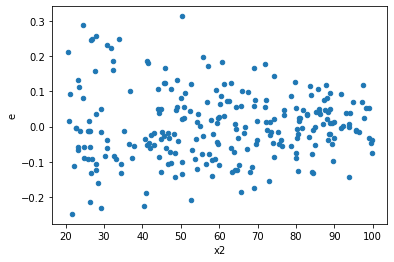

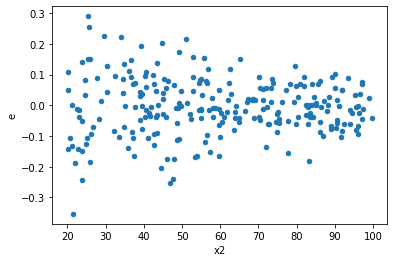

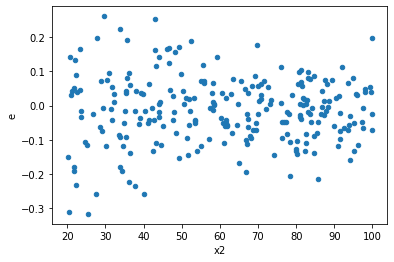

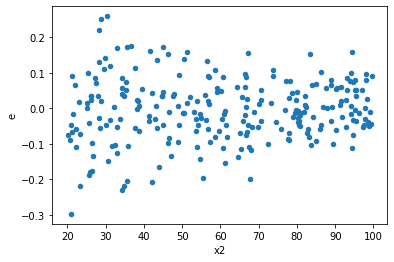

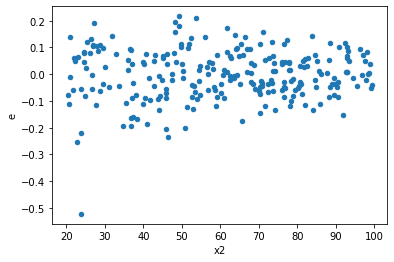

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.4743473366692361,0.4518245991345256,0.01519945707906429,0.004657985558087893,0.30645736448730104,1.5831628839057956e-08,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1.3506696279912314,0.4170032917328144,0.013924429154548777,0.0042990030075547876,0.30873818666745173,1.9243152399737567e-08,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.5181181946894464,0.5817552961962194,0.01565070303803553,0.005997477280373396,0.38320817063603274,3.7359385569624384e-06,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.2203886255194407,0.5125476643539058,0.012581326036282894,0.005283996539730987,0.41998725130345044,2.7030521417755283e-05,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1.2185602365182513,0.46827562646140775,0.012562476665136612,0.004827583777952657,0.38428598966875444,3.978782243835134e-06,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1.1709324559246381,0.45362049176885894,0.012071468617779774,0.004676499915142875,0.3874010746509312,4.764488139595031e-06,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1.6260929887049516,0.417329880036632,0.016763845244380945,0.0043023698972848665,0.256645765608399,1.1392285148915513e-10,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,1.2865030072598547,0.5159630105901302,0.013262917600617059,0.00531920629474361,0.4010585343979015,1.0184038750865658e-05,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1.253015092826604,0.4825506630828509,0.012917681369346432,0.004974749103946917,0.3851116126576679,4.174519615486023e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64